##Find all libraries used

In [ ]:
!pip list command
#!pip freeze

##Mount Google Drive to import files from google drive to this notebook

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Basic and upgraded version of local descriptor for a point of an image

In [11]:
import numpy as np
import cv2
from scipy.ndimage import map_coordinates
from google.colab.patches import cv2_imshow


def myLocalDescriptor(I, p, rho_min, rho_max, rho_step, N):
    d = []
    #height and width of the image
    h, w = I.shape
    #if the point p is close to the limits of the image return an empty vector
    if p[0] - rho_max < 1 or p[1] - rho_max < 1 or p[0] + rho_max > h or p[1] + rho_max > w:
      return []

    #for every circle with center p and radius from rho_min:rho_max
    for rho in np.arange(rho_min, rho_max + rho_step, rho_step):
        avg = 0.0
        for theta in np.linspace(0, 2 * np.pi, N, endpoint=False):
            #find the coordinates of each of the N points of the circle
            y = p[0] + rho * np.sin(theta)
            x = p[1] + rho * np.cos(theta)
            if 0 <= x < w and 0 <= y < h:
                #interpolation of the image values based on the position to which they correspond from the circle
                #and add the elements to take the average of the vector
                avg += map_coordinates(I, [[y], [x]], order=1)
            else:
                return []
        avg /= N
        d.append(avg)
    return np.array(d)

def myLocalDescriptorUpgrade(I, p, rho_min, rho_max, rho_step, N):
    d = []
    #height and width of the image
    h, w = I.shape
    #if the point p is close to the limits of the image return an empty vector
    if p[0] - rho_max < 1 or p[1] - rho_max < 1 or p[0] + rho_max > h or p[1] + rho_max > w:
      return []

    #for every circle with center p and radius from rho_min:rho_max
    for rho in np.arange(rho_min, rho_max + rho_step, rho_step):
        avg = 0.0
        max_val = 0
        values=[]
        for theta in np.linspace(0, 2 * np.pi, N, endpoint=False):
            #find the coordinates of each of the N points of the circle
            y = p[0] + rho * np.sin(theta)
            x = p[1] + rho * np.cos(theta)
            if 0 <= x < w and 0 <= y < h:
                #interpolation of the image values based on the position to which they correspond from the circle
                val = map_coordinates(I, [[y], [x]], order=1)
                #append the image values that belong to each circle to a list and find the avg,max value and standard deviation
                values.append(val)
                avg += val
                max_val = max(max_val, val)
            else:
                return []
        avg /= N
        std_val=np.array([np.std(values)])
        #d.extend([avg, max_val,std_val])
        d.append([avg, max_val,std_val])
    return np.array(d)



##Examples of both local descriptors for rhom=5,rhoM=20,rhostep=1, N=8 for grayscale im1.png for different angles and points

In [5]:
# Load image as grayscale
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/im1.png', cv2.IMREAD_GRAYSCALE)

# Parameters
rho_min = 5
rho_max = 20
rho_step = 1
N = 8

#rotate image with angle theta1 and theta2
p = [100, 100]
theta1=13
theta2=37
#rotate the image with angles theta1 and theta2 around the point p
image_center =p
rot_mat = cv2.getRotationMatrix2D(image_center, theta1, 1.0)
# rotate image
rotated_image1 = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderMode=cv2.BORDER_CONSTANT, borderValue=255)
rot_mat = cv2.getRotationMatrix2D(image_center, theta2, 1.0)
# rotate image
rotated_image2 = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderMode=cv2.BORDER_CONSTANT, borderValue=255)



# Compute descriptors for p=[100,100] and 2 different angles
print("Basic local descriptor for im1.png with rotation angle theta1")
descriptor1 = myLocalDescriptor(rotated_image1, p, rho_min, rho_max, rho_step, N)
print(descriptor1)
print("Basic local descriptor for im1.png with rotation angle theta2")
descriptor2 = myLocalDescriptor(rotated_image2, p, rho_min, rho_max, rho_step, N)
print(descriptor2)
print("Upgraded local descriptor for im1.png with rotation angle theta1")
upgraded_descriptor1 = myLocalDescriptorUpgrade(rotated_image1, p, rho_min, rho_max, rho_step, N)
print(upgraded_descriptor1)
print("Upgraded local descriptor for im1.png with rotation angle theta2")
upgraded_descriptor2 = myLocalDescriptorUpgrade(rotated_image2, p, rho_min, rho_max, rho_step, N)
print(upgraded_descriptor2)

#Compute descriptors for q1=[200,200] and q2=[202,202] for im1.png
q1=[200,200]
q2=[202,202]


print("Basic local descriptor for im1.png and point q1=[200,200]")
descriptor1 = myLocalDescriptor(image, q1, rho_min, rho_max, rho_step, N)
print(descriptor1)
print("Upgraded local descriptor for im1.png and point q1=[200,200]")
upgraded_descriptor1 = myLocalDescriptorUpgrade(image, q1, rho_min, rho_max, rho_step, N)
print(upgraded_descriptor1)
print("Basic local descriptor for im1.png and point q2=[202,202]")
descriptor2 = myLocalDescriptor(image, q2, rho_min, rho_max, rho_step, N)
print(descriptor2)
print("Upgraded local descriptor for im1.png and point q2=[202,202]")
upgraded_descriptor2 = myLocalDescriptorUpgrade(image, q2, rho_min, rho_max, rho_step, N)
print(upgraded_descriptor2)

Basic local descriptor for im1.png with rotation angle theta1
[[148.375]
 [148.125]
 [145.25 ]
 [143.625]
 [145.625]
 [147.625]
 [147.625]
 [149.125]
 [152.75 ]
 [151.625]
 [143.25 ]
 [140.   ]
 [142.75 ]
 [140.   ]
 [128.375]
 [121.625]]
Basic local descriptor for im1.png with rotation angle theta2
[[154.125]
 [157.125]
 [156.625]
 [164.375]
 [166.5  ]
 [167.25 ]
 [161.625]
 [160.75 ]
 [157.75 ]
 [150.875]
 [138.75 ]
 [141.125]
 [146.5  ]
 [143.375]
 [138.   ]
 [134.625]]
Upgraded local descriptor for im1.png with rotation angle theta1
[[[148.375     ]
  [189.        ]
  [ 30.89877627]]

 [[148.125     ]
  [183.        ]
  [ 35.23293026]]

 [[145.25      ]
  [186.        ]
  [ 39.66342774]]

 [[143.625     ]
  [192.        ]
  [ 38.91316455]]

 [[145.625     ]
  [194.        ]
  [ 34.27804509]]

 [[147.625     ]
  [197.        ]
  [ 33.43253468]]

 [[147.625     ]
  [201.        ]
  [ 32.22164451]]

 [[149.125     ]
  [203.        ]
  [ 32.40153353]]

 [[152.75      ]
  [206.        ]

##Function isCorner that returns True or False if the image has an edge or not in the pixel p

In [75]:
def isCorner(I,p,k,Rthresh):
    offset = 5 #int( window_size / 2 )
    #  Calculate the x and y image derivatives (dx and dy)
    dx = cv2.Sobel(I[p[0]-offset:p[0]+1+offset, p[1]-offset:p[1]+1+offset], cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(I[p[0]-offset:p[0]+1+offset, p[1]-offset:p[1]+1+offset], cv2.CV_64F, 0, 1, ksize=3)
    #  Calculate product and second derivatives (dx2, dy2 and dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy = cv2.multiply(dx, dy)

    #  Calculate the sum of the products of the derivatives for each window size
    Sx2 = np.sum(dx2)
    Sy2 = np.sum(dy2)
    Sxy = np.sum(dxy)

    #  Define the matrix Μ(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
    M = np.array([[Sx2,Sxy],[Sxy,Sy2]])

    # Calculate the response  ( R=det(Μ)-k(Trace(Μ))^2 )
    det=np.linalg.det(M)
    tr=np.matrix.trace(M)
    R=det-k*(tr**2)

    #normalize value R to range 0-1
    cv2.normalize(R, R, 0, 1, cv2.NORM_MINMAX)
    #if the response is greater than the threshold (positive) then the pixel p is an edge
    if R>Rthresh:
      return True

    return False





##Harris Edge Detector for an image with the use of isCorner.However with the use of isCorner takes too much time so i had to implement one different one without the use of the functions isCorner

In [ ]:
def myDetectHarrisFeatures2(I):
  h, w = I.shape
  offset=5
  #window_size=10
  Rthresh=0.3
  k=0.04
  corners=[]
  #for every pixel except of those close to the limits of the image check if the pixel is a corner
  for y in range(offset, h-offset):
    for x in range(offset, w-offset):
      if isCorner(I,[y,x],k,Rthresh):
        corners.append([y,x])

  return corners
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/im1.png', cv2.IMREAD_GRAYSCALE)/255
corners=myDetectHarrisFeatures2(image)

In [76]:
def myDetectHarrisFeatures(I):
  h, w = I.shape
  offset=5
  #window_size=10
  Rthresh=0.35
  k=0.05
  corners=[]
  h, w = I.shape
  #matrix that will hold the R values for all the pixels of the image
  matrix_R = np.zeros((h,w))
  #  Calculate the x and y image derivatives (dx and dy)
  dx = cv2.Sobel(I, cv2.CV_64F, 1, 0, ksize=3)
  dy = cv2.Sobel(I, cv2.CV_64F, 0, 1, ksize=3)
  # Calculate product and second derivatives (dx2, dy2 e dxy)
  dx2=np.square(dx)
  dy2=np.square(dy)
  dxy = cv2.multiply(dx, dy)

  #take care of the limits of the image if we check a pixel close to the limits
  for y in range(h):
    for x in range(w):
      yl=y-offset
      yr=y+1+offset
      xl=x-offset
      xr=x+1+offset
      if y-offset<1:
        yl=0
      if y+offset>=h:
        yr=h
      if x-offset<1:
        xl=0
      if x+offset>=w:
        xr=w

      # Calculate the sum of the products of the derivatives for each window size
      Sx2 = np.sum(dx2[yl:yr, xl:xr])
      Sy2 = np.sum(dy2[yl:yr, xl:xr])
      Sxy = np.sum(dxy[yl:yr, xl:xr])


      #  Define the matrix M(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
      M = np.array([[Sx2,Sxy],[Sxy,Sy2]])

      # Calculate the response ( R=det(H)-k(Trace(H))^2 )
      det=np.linalg.det(M)
      tr=np.matrix.trace(M)
      R=det-k*(tr**2)
      matrix_R[y, x]=R

  #normalize the values  R of the matrix_R before applying the threshold
  cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
  for y in range(h):
    for x in range(w):
      value=matrix_R[y, x]
      if value>Rthresh:
        corners.append([y,x])
  return corners

##Find the descriptors for every point of each image that is a corner and add them in the lists points1 and points2

In [1]:
from skimage.feature import  corner_peaks


#parameters for local descriptor
rho_min = 5
rho_max = 20
rho_step = 1
N = 8


image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/im1.png', cv2.IMREAD_GRAYSCALE)/255
#find the corners of image1
corners1=myDetectHarrisFeatures(image1)
h,w=image1.shape
#create a matrix cornersnon1 where the coordinates of the corners1 have a value=1 to the matrix
cornersnon1=np.zeros((h, w))
for corner in corners1:
  cornersnon1[corner[0],corner[1]]=1
# apply Non-maximum suppression to the corners
newcorners1=corner_peaks(cornersnon1,min_distance=3)
points1=[]
#find the local descriptor for every corner of image1
for corner in newcorners1:
  descriptor1 = myLocalDescriptor(image1, corner, rho_min, rho_max, rho_step, N)
  points1.append(descriptor1)



image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/im2.png', cv2.IMREAD_GRAYSCALE)/255
#find the corners of image1
corners2=myDetectHarrisFeatures(image2)
h,w=image2.shape
#create a matrix cornersnon2 where the coordinates of the corners2 have a value=1 to the matrix
cornersnon2=np.zeros((h, w))
for corner in corners2:
  cornersnon2[corner[0],corner[1]]=1
# apply Non-maximum suppression to the corners
newcorners2=corner_peaks(cornersnon2,min_distance=3)
points2=[]
#find the local descriptor for every corner of image2
for corner in newcorners2:
  descriptor2 = myLocalDescriptor(image2, corner, rho_min, rho_max, rho_step, N)
  points2.append(descriptor2)


#save the following variable in order to not to download the file and to not be needed to run this cell all the time
np.save('/content/points1.npy', points1)
np.save('/content/points2.npy', points2)
np.save('/content/newcorners1.npy', newcorners1)
np.save('/content/newcorners2.npy', newcorners2)

#find the upgraded local descriptor for every corner of image1
points1up=[]
for corner in newcorners1:
  descriptor1 = myLocalDescriptorUpgrade(image1, corner, rho_min, rho_max, rho_step, N)
  points1up.append(descriptor1)

#find the upgraded local descriptor for every corner of image2
points2up=[]
for corner in newcorners2:
  descriptor2 = myLocalDescriptorUpgrade(image1, corner, rho_min, rho_max, rho_step, N)
  points2up.append(descriptor2)

np.save('/content/points1up.npy', points1up)
np.save('/content/points2up.npy', points2up)


NameError: ignored

##Load the variables values that were computed earlier and stored in the google drive

In [13]:
points1 = np.load('/content/drive/MyDrive/Colab Notebooks/points1.npy',allow_pickle=True)
points2 = np.load('/content/drive/MyDrive/Colab Notebooks/points2.npy',allow_pickle=True)
points1up = np.load('/content/drive/MyDrive/Colab Notebooks/points1up.npy',allow_pickle=True)
points2up = np.load('/content/drive/MyDrive/Colab Notebooks/points2up.npy',allow_pickle=True)
newcorners1= np.load('/content/drive/MyDrive/Colab Notebooks/newcorners1.npy',allow_pickle=True)
newcorners2 = np.load('/content/drive/MyDrive/Colab Notebooks/newcorners2.npy',allow_pickle=True)

##Compare all the descriptors of the images together and find the best that match according to a threashold,returning their indices to the lists points1 and points2  

In [91]:
def descriptorMatching(points1, points2, percentageThreshold):
    #find the number of corners of image1 and image2 and create a matrix that will contain the euclidean distance of all their between descriptors
    N1 = len(points1)
    N2 = len(points2)
    distances = np.zeros((N1, N2))
    matchingPoints = []

    for i in range(N1):
        for j in range(N2):
            # Compute Euclidean distance between descriptors
            if len(points1[i])>1 and len(points2[j])>1:
              distance = np.linalg.norm(points1[i] - points2[j])
              distances[i, j] = distance
            else:
              distances[i, j] = float('inf')

    # Calculate the threshold value and apply this threshold value to the distances of the descriptors to keep a percentage of them
    threshold = np.percentile(distances, percentageThreshold)
    for i in range(N1):
        for j in range(N2):
            # Keep points that satisfy the threshold
            if distances[i, j] <= threshold:
                matchingPoints.append([i, j])

    #return a matrix of shape(2,n)where n is the number of possible matching points
    matchingPoints = np.array(matchingPoints).T
    return matchingPoints

##Find the indices of all the matching points to the lists points1 and points 2 and save them

In [92]:
matchingPoints = descriptorMatching(points1, points2,30)

In [95]:
np.save('/content/matchingPoints.npy', matchingPoints)

In [7]:
matchingPoints=np.load('/content/drive/MyDrive/Colab Notebooks/matchingPoints.npy',allow_pickle=True)

##Find best transformation H and based on that the outliers and inliers of matching points

In [25]:
def myRANSAC(matchingPoints,corners1,corners2, r, N):
    num_matches = matchingPoints.shape[1]
    best_score = float('inf')
    best_H = None
    inlierMatchingPoints = []
    outlierMatchingPoints = []

    for _ in range(N):
        # Randomly select two pairs of matching points
        indices = np.random.choice(num_matches, 2, replace=False)
        P1 = corners1[matchingPoints[0, indices[0]]]
        P2 = corners2[matchingPoints[1, indices[0]]]
        P3= corners1[matchingPoints[0, indices[1]]]
        P4= corners2[matchingPoints[1, indices[1]]]



        # Calculate transformation H based on these 2 pairs
        B=P3[0]-P1[0]
        A=P3[1]-P1[1]
        C=P4[1]-P2[1]
        D=P4[0]-P2[0]
        theta= np.arccos((B*D+A*C)/(A**2+B**2))
        d = P2 - np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]]) @ P1

        H = {'theta': theta, 'd': d}

        # Calculate the score
        score = 0
        for i in range(num_matches):
            if i not in indices:
                P1 = corners1[matchingPoints[0, i]]
                P2 = d + np.array([[np.cos(theta), -np.sin(theta)],
                                                      [np.sin(theta), np.cos(theta)]]) @ P1

                # Calculate Euclidean distance between transformed point and the corresponding one
                distance = np.linalg.norm(P2 - corners2[matchingPoints[1, i]])
                score += distance

        if score < best_score:
            best_score = score
            best_H = H

    #based on the best H and the value r ,find the inliers and outliers
    for i in range(num_matches):
        P1 = corners1[matchingPoints[0, i]]
        P2 = best_H['d'] + np.array([[np.cos(best_H['theta']), -np.sin(best_H['theta'])],
                                              [np.sin(best_H['theta']), np.cos(best_H['theta'])]]) @ P1

        # Calculate Euclidean distance between transformed points
        distance = np.linalg.norm(P2 - corners2[matchingPoints[1, i]])
        if distance <= r:
            inlierMatchingPoints.append(matchingPoints[:, i])
        else:
            outlierMatchingPoints.append(matchingPoints[:, i])

    inlierMatchingPoints = np.array(inlierMatchingPoints).T
    outlierMatchingPoints = np.array(outlierMatchingPoints).T

    return best_H, inlierMatchingPoints, outlierMatchingPoints


In [46]:
H, inlierMatchingPoints , outlierMatchingPoints=myRANSAC(matchingPoints,newcorners1,newcorners2, 2, 30)

<ipython-input-25-b2ea6d389095>:23: RuntimeWarning: invalid value encountered in arccos
  theta= np.arccos((B*D+A*C)/(A**2+B**2))


In [47]:
np.save('/content/H2.npy', H)
np.save('/content/inlierMatchingPoints2.npy', inlierMatchingPoints)
np.save('/content/outlierMatchingPoints2.npy', outlierMatchingPoints)


In [10]:
H=np.load('/content/drive/MyDrive/Colab Notebooks/H2.npy',allow_pickle=True)
inlierMatchingPoints=np.load('/content/drive/MyDrive/Colab Notebooks/inlierMatchingPoints.npy',allow_pickle=True)
outlierMatchingPoints=np.load('/content/drive/MyDrive/Colab Notebooks/outlierMatchingPoints.npy',allow_pickle=True)

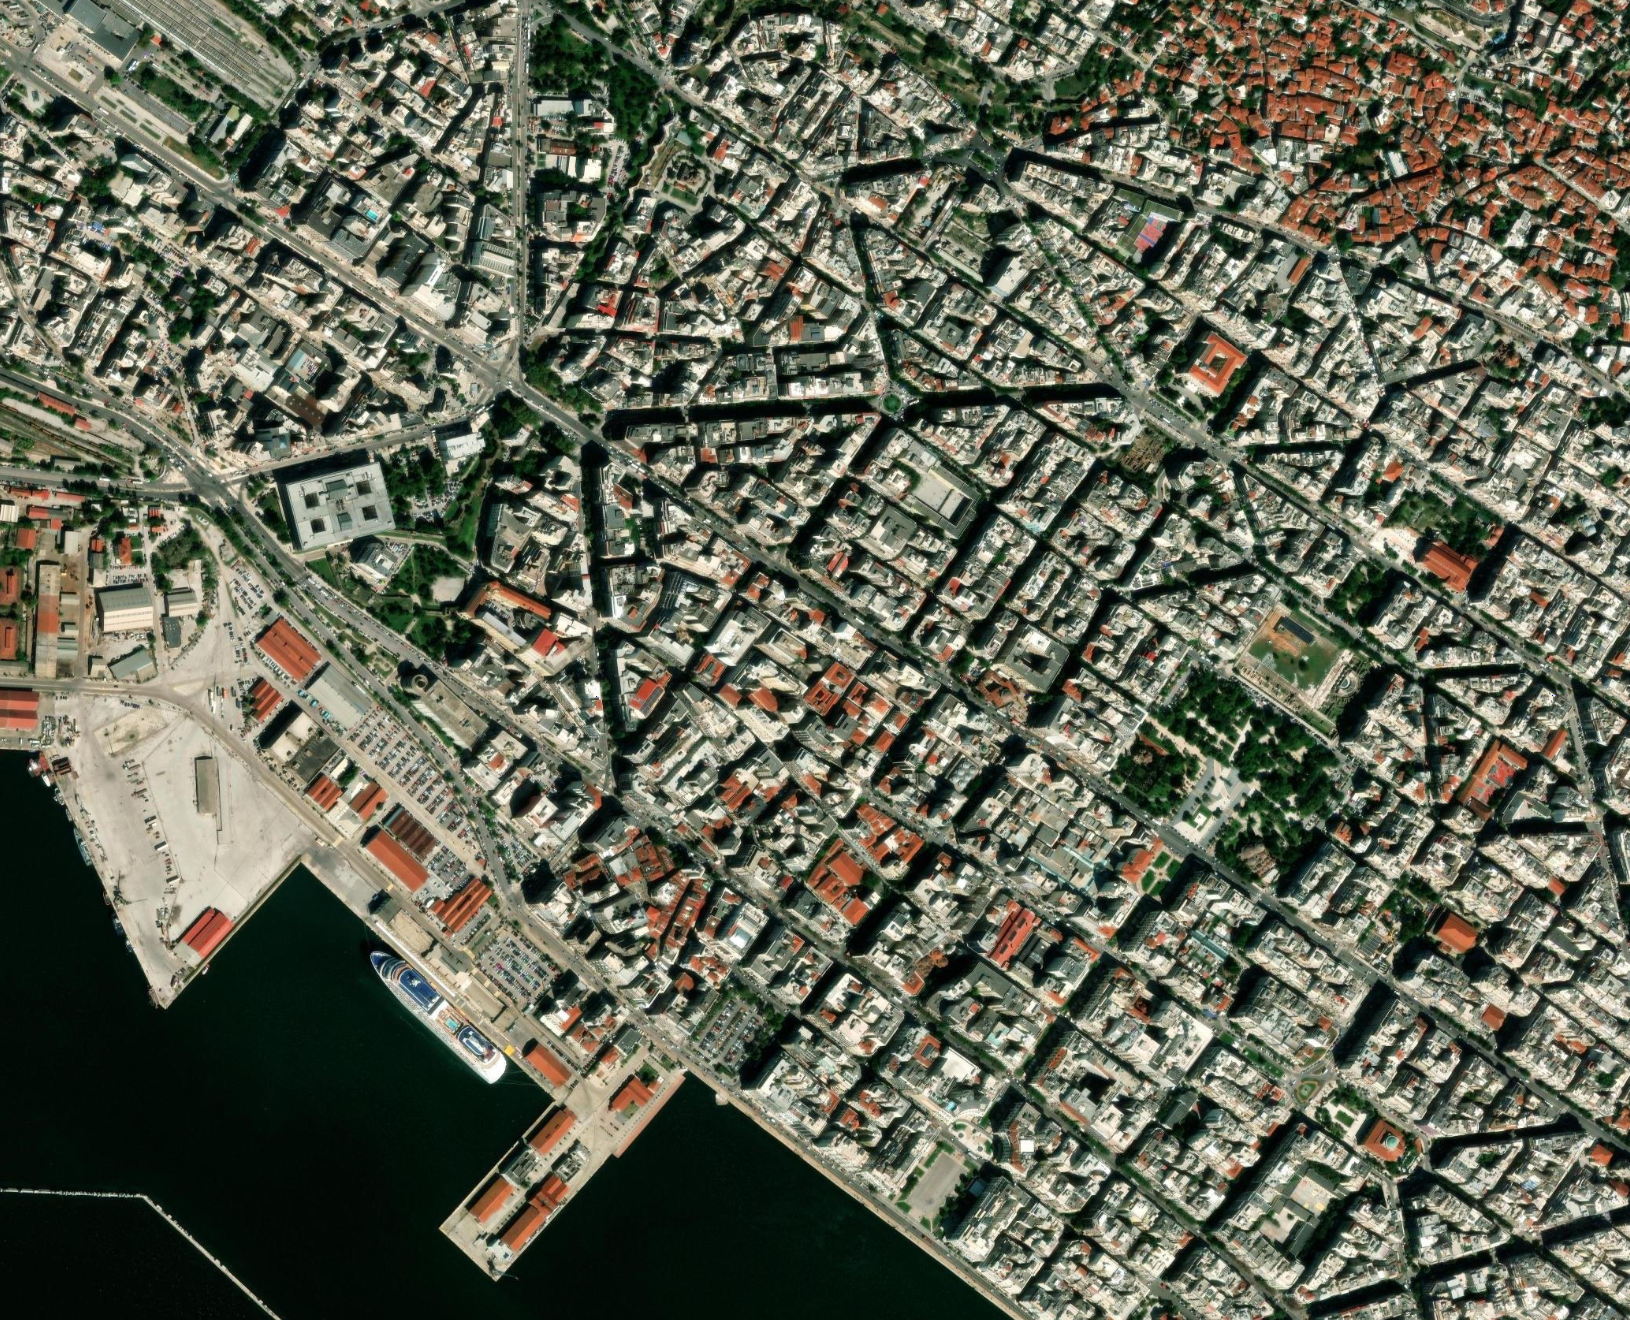

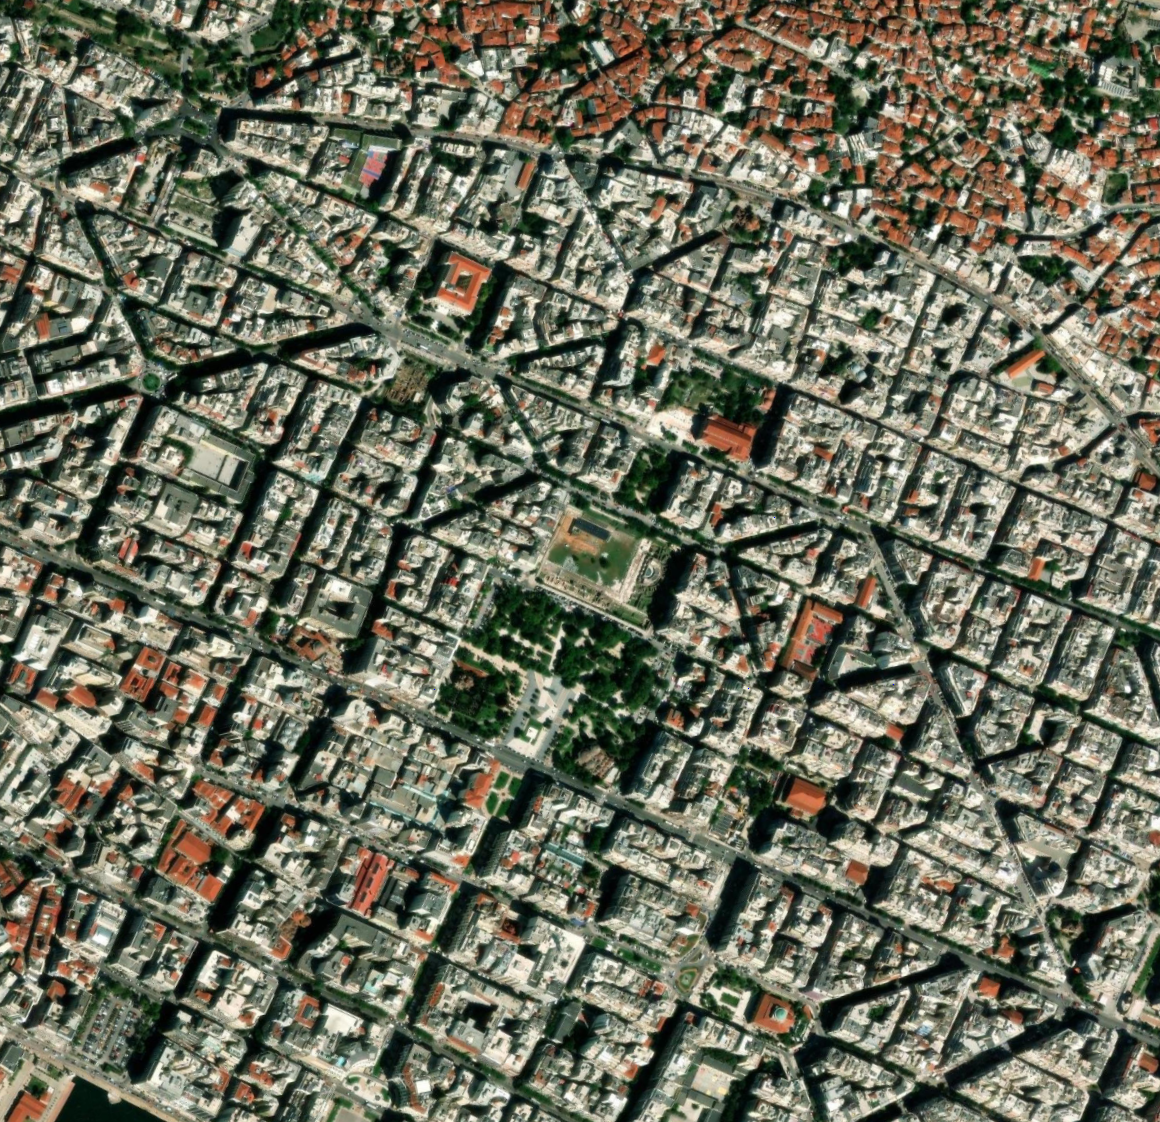

In [16]:
import matplotlib.pyplot as plt

image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/im1.png')
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/im2.png')
img_copy1 = np.copy(image1)
img_copy2 = np.copy(image2)

for inlier in inlierMatchingPoints:
  img_copy1[newcorners1[inlier[0]][0],newcorners1[inlier[0]][1]]=[255,0,0]
  img_copy2[newcorners2[inlier[1]][0],newcorners2[inlier[1]][1]]=[255,0,0]

for outlier in outlierMatchingPoints:
  img_copy1[newcorners1[outlier[0]][0],newcorners1[outlier[0]][1]]=[255,0,0]
  img_copy2[newcorners2[outlier[1]][0],newcorners2[outlier[1]][1]]=[255,0,0]

cv2_imshow(img_copy1)
cv2_imshow(img_copy2)

